In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import cvxpy as cp
from scipy.stats import poisson, uniform, expon, pareto
from scipy.optimize import minimize, fsolve
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

# a \in [1,2)

In [66]:
v1, v2, b1, b2 = sp.symbols('v_1 v_2 b_1 b_2')
a = 1.1
x1 = b1**(a)/(b1**(a)+b2**(a))
x2 = b2**(a)/(b1**(a)+b2**(a))
u1 = x1*v1-b1
u2 = x2*v2-b2

part1 = sp.simplify(sp.diff(u1, b1))
part2 = sp.simplify(sp.diff(u2, b2))

foc1 = sp.Eq(part1, 0)
foc2 = sp.Eq(part2, 0)
foc1

Eq(1.1*b_1**0.1*b_2**1.1*v_1/(b_1**1.1 + b_2**1.1)**2 - 1, 0)

In [67]:
# double partial
sp.simplify(sp.diff(part2, b2))

b_1**1.1*v_2*(0.11*b_1**1.1 - 2.31*b_2**1.1)/(b_2**0.9*(b_1**1.1 + b_2**1.1)**3)

# system solver

In [68]:
foc1sc = sp.lambdify((b1, b2), part1.evalf(subs={v1:4}))
foc2sc = sp.lambdify((b1, b2), part2.evalf(subs={v2:2}))
foc1sc(0.8, 0.8), foc2sc(0.8, 0.8)

(0.3750000000000002, -0.3124999999999999)

In [69]:
def eqs(bs):
    b1, b2 = bs
    return [foc1sc(b1,b2), foc2sc(b1,b2)]

initial_guess = [0.5, 0.5]
solution = fsolve(eqs, initial_guess)
solution

array([0.95443372, 0.47721686])

# a = 1/2

In [70]:
v1, v2, b1, b2 = sp.symbols('v_1 v_2 b_1 b_2')
a = 1/2
x1 = b1**(a)/(b1**(a)+b2**(a))
x2 = b2**(a)/(b1**(a)+b2**(a))
u1 = x1*v1-b1
u2 = x2*v2-b2

part1 = sp.simplify(sp.diff(u1, b1))
part2 = sp.simplify(sp.diff(u2, b2))

foc1 = sp.Eq(part1, 0)
foc2 = sp.Eq(part2, 0)
foc1

Eq(0.5*b_2**0.5*v_1/(b_1**0.5*(b_1**0.5 + b_2**0.5)**2) - 1, 0)

In [78]:
part2

0.5*b_1**0.5*v_2/(b_2**0.5*(b_1**0.5 + b_2**0.5)**2) - 1

In [87]:
foc1sc = sp.lambdify((b1, b2), part1.evalf(subs={v1:4}))
foc2sc = sp.lambdify((b1, b2), part2.evalf(subs={v2:2}))
foc1sc(0.48528,0.24264)

2.831846707795904e-06

In [88]:
def eqs(bs):
    b1, b2 = bs
    return [foc1sc(b1,b2), foc2sc(b1,b2)]

initial_guess = [0.4, 0.2]
solution = fsolve(eqs, initial_guess)
solution

array([0.48528137, 0.24264069])

# Potential tullock

In [89]:
# 1/2 case.
vi, xi = sp.symbols('v_i x_i')
y,  a  = sp.symbols('y a')

t1 = vi*xi*a * (xi**(1-1/a) - xi**(2-1/a))
t2 = sp.integrate(vi*y*((a-1)*y**(-1/a)-(2*a-1)*y**(1-1/a)), (y, 0, xi))
uhat = t1 - t2
uhat

a*v_i*x_i*(x_i**(1 - 1/a) - x_i**(2 - 1/a)) - Piecewise((v_i*(log(x_i)/3 + 2/(3*x_i)) - oo*sign(v_i), Eq(a, 1/3)), (-v_i*log(x_i)/2 - oo*sign(v_i), Eq(a, 1/2)), (v_i*(-4*a**3*x_i**2*x_i**(1/a)*x_i**(1 - 1/a)/(6*a**2*x_i**(1/a) - 5*a*x_i**(1/a) + x_i**(1/a)) + 3*a**3*x_i**2/(6*a**2*x_i**(1/a) - 5*a*x_i**(1/a) + x_i**(1/a)) + 4*a**2*x_i**2*x_i**(1/a)*x_i**(1 - 1/a)/(6*a**2*x_i**(1/a) - 5*a*x_i**(1/a) + x_i**(1/a)) - 4*a**2*x_i**2/(6*a**2*x_i**(1/a) - 5*a*x_i**(1/a) + x_i**(1/a)) - a*x_i**2*x_i**(1/a)*x_i**(1 - 1/a)/(6*a**2*x_i**(1/a) - 5*a*x_i**(1/a) + x_i**(1/a)) + a*x_i**2/(6*a**2*x_i**(1/a) - 5*a*x_i**(1/a) + x_i**(1/a))), True))

In [132]:
y,  a  = sp.symbols('y a')
integrand = vi*y*((a-1)*y**(-1/a)-(2*a-1)*y**(1-1/a))
t2 = sp.integrate(integrand.evalf(subs={a:1/3+0.1}), (y, 0, xi))
t2.evalf(subs={a:1/3+0.1})

v_i*(1.84166666666667/x_i**0.307692307692307 + 0.192592592592592*x_i**0.692307692307693) - oo*sign(v_i)

In [133]:
y,  a  = sp.symbols('y a')
t2 = sp.integrate(vi*y*((a-1)*y**(-1/a)-(2*a-1)*y**(1-1/a)), (y, 0, xi))
t2.evalf(subs={a:1/3+0.1})

v_i*(1.84166666666665/x_i**0.307692307692307 + 0.192592592592593*x_i**0.692307692307693)

In [134]:
integrand = vi*y*((a-1)*y**(-1/a)-(2*a-1)*y**(1-1/a))
sp.simplify(integrand.evalf(subs={a:1/3+0.1}))

-0.566666666666667*v_i/y**1.30769230769231 + 0.133333333333333*v_i/y**0.307692307692307

In [135]:
sp.integrate(integrand.evalf(subs={vi:1, a:1/3+0.1}), (y, 0, xi))#.evalf(subs={xi:1/2})

1.84166666666667/x_i**0.307692307692307 + 0.192592592592592*x_i**0.692307692307693 - oo

In [150]:
sp.simplify(integrand.evalf(subs={vi:1, a:1/3}))

-0.666666666666667/y**2.0 + 0.333333333333333/y**1.0

In [151]:
sp.simplify(integrand.evalf(subs={vi:1, a:1/4}))

-0.75/y**3.0 + 0.5/y**2.0

In [152]:
sp.simplify(integrand.evalf(subs={vi:1, a:1/5}))

-0.8/y**4.0 + 0.6/y**3.0

In [153]:
sp.simplify(integrand.evalf(subs={vi:1, a:1/6}))

-0.833333333333333/y**5.0 + 0.666666666666667/y**4.0

In [157]:
sp.simplify(integrand.evalf(subs={vi:1, a:1/2}))

-0.5/y**1.0

In [156]:
sp.integrate(integrand.evalf(subs={vi:1, a:1/2}), (y, 0, xi))#.evalf(subs={xi:1/2})

-0.5*log(x_i) - oo

In [163]:
uhat.evalf(subs={a:1/2})

0.5*v_i*x_i*(x_i**(-1.0) - 1.0) + 0.5*v_i*log(x_i) + oo*sign(v_i)

# procurement direct

In [167]:
# derive normal way
c1, c2, v1, v2 = sp.symbols('c_1 c_2 v_1 v_2')

u1 = (c1-v1) * (1/c1)**3 / ((1/c1)**3 + (1/c2)**3)
u2 = (c2-v2) * (1/c2)**3 / ((1/c1)**3 + (1/c2)**3)
u1

(c_1 - v_1)/(c_1**3*(c_2**(-3) + c_1**(-3)))

In [168]:
sp.simplify(sp.diff(u1, c1))
sp.diff(u2, c2)

1/(c_2**3*(c_2**(-3) + c_1**(-3))) - 3*(c_2 - v_2)/(c_2**4*(c_2**(-3) + c_1**(-3))) + 3*(c_2 - v_2)/(c_2**7*(c_2**(-3) + c_1**(-3))**2)

In [169]:
part1 = sp.diff(u1, c1)
part2 = sp.diff(u2, c2)
foc1 = sp.Eq(part1, 0)
foc2 = sp.Eq(part2, 0)
foc1

Eq(1/(c_1**3*(c_2**(-3) + c_1**(-3))) - 3*(c_1 - v_1)/(c_1**4*(c_2**(-3) + c_1**(-3))) + 3*(c_1 - v_1)/(c_1**7*(c_2**(-3) + c_1**(-3))**2), 0)

In [171]:
foc1sc = sp.lambdify((c1, c2), part1.evalf(subs={v1:4}))
foc2sc = sp.lambdify((c1, c2), part2.evalf(subs={v2:2}))

In [172]:
def eqs(cs):
    c1, c2 = cs
    return [foc1sc(c1,c2), foc2sc(c1,c2)]

initial_guess = [0.4, 0.2]
solution = fsolve(eqs, initial_guess)
solution

array([9.66287915, 8.8109329 ])

In [173]:
x1 = (1/solution[0])**(3) / ((1/solution[0])**(3) + (1/solution[1])**(3))
x2 = (1/solution[1])**(3) / ((1/solution[0])**(3) + (1/solution[1])**(3))
x1, x2

(0.4312151766251178, 0.5687848233748822)

# procurement best response

In [175]:
# true values
v1, v2 = 4, 2

# init conditions
curr1, curr2 = 1, 1
a = 3

# symbols
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)

p1Bids24, p2Bids24 = [curr1], [curr2]
turn = 0
for turn in tqdm(range(200)):
    if turn % 2 == 0:
        x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
        u1 = (c1-v1)*x1
        partial = sp.diff(u1, c1)
        best = sp.Eq(partial, 0).evalf(subs={c2:curr2})
        sol = sp.solve(best)[0]
        curr1 = sol
        p1Bids24.append(curr1)
    else:
        x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
        u2 = (c2-v2)*x2
        partial = sp.diff(u2, c2)
        best = sp.Eq(partial, 0).evalf(subs={c1:curr1})
        sol = sp.solve(best)[0]
        curr2 = sol
        p2Bids24.append(curr2)
p1Bids24[-1], p2Bids24[-1]

100%|██████████| 200/200 [00:38<00:00,  5.18it/s]


(9.66287914802542, 8.81093289882157)

# procurement potential function

In [202]:
a, xi = sp.symbols('a x_i')
y     = sp.symbols('y')

expr = a*y**(1/a)*(1-y) / (a-a*y-1)
expr

a*y**(1/a)*(1 - y)/(-a*y + a - 1)

In [203]:
print_latex(sp.diff(expr, y))
integrand = sp.diff(expr, y)
# -y*sp.simplify(integrand.evalf(subs={a:3}))
sp.simplify(integrand)

\frac{a^{2} y^{\frac{1}{a}} \left(1 - y\right)}{\left(- a y + a - 1\right)^{2}} - \frac{a y^{\frac{1}{a}}}{- a y + a - 1} + \frac{y^{\frac{1}{a}} \left(1 - y\right)}{y \left(- a y + a - 1\right)}


(a**2*y**((a + 1)/a)*(1 - y) + a*y**((a + 1)/a)*(a*y - a + 1) + y**(1/a)*(y - 1)*(a*y - a + 1))/(y*(a*y - a + 1)**2)

In [204]:
t1 = -vi*xi*a*(xi**(1/a) *(1-xi)) / (a-a*xi-1)
t2 = sp.integrate(-vi*y*(sp.simplify(integrand)), (y, 0, xi))
t2

-v_i*(Integral(-y**(1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)) + Integral(a*y**(1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)) + Integral(a*y**(1 + 1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)) + Integral(y*y**(1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)) + Integral(-2*a*y*y**(1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)) + Integral(a*y**2*y**(1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)))

In [205]:
uhat = t1 - t2
uhat

-a*v_i*x_i*x_i**(1/a)*(1 - x_i)/(-a*x_i + a - 1) + v_i*(Integral(-y**(1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)) + Integral(a*y**(1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)) + Integral(a*y**(1 + 1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)) + Integral(y*y**(1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)) + Integral(-2*a*y*y**(1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)) + Integral(a*y**2*y**(1/a)/(a**2*y**2 - 2*a**2*y + a**2 + 2*a*y - 2*a + 1), (y, 0, x_i)))

In [206]:
# two player, v1=4, v2=2, a=3
uhat1 = uhat.evalf(subs={a:2.9999999999999999, vi:4})
uhat2 = uhat.evalf(subs={a:2.9999999999999999, vi:2})
uhat2

-6.0*x_i**1.33333333333333*(1.0 - x_i)/(2.0 - 3.0*x_i) + 2.0*Integral(-y**0.333333333333333/(9.0*y**2 - 12.0*y + 4.0), (y, 0, x_i)) + 2.0*Integral(3.0*y**0.333333333333333/(9.0*y**2 - 12.0*y + 4.0), (y, 0, x_i)) + 2.0*Integral(-6.0*y**1.33333333333333/(9.0*y**2 - 12.0*y + 4.0), (y, 0, x_i)) + 2.0*Integral(y**1.33333333333333/(9.0*y**2 - 12.0*y + 4.0), (y, 0, x_i)) + 2.0*Integral(3.0*y**1.33333333333333/(9.0*y**2 - 12.0*y + 4.0), (y, 0, x_i)) + 2.0*Integral(3.0*y**2.33333333333333/(9.0*y**2 - 12.0*y + 4.0), (y, 0, x_i))

In [207]:
testX = 0.4
sumhats = uhat1.evalf(subs={xi:testX}) + uhat2.evalf(subs={xi:1-testX})
sumhats

-3.46106416126206

In [182]:
res = []
candidates = np.arange(0.43, 0.432, 0.0001)
for testX in tqdm(candidates):
    res.append(uhat1.evalf(subs={xi:testX}) + uhat2.evalf(subs={xi:1-testX}))
res = np.array(res)

100%|██████████| 21/21 [00:55<00:00,  2.65s/it]


In [183]:
res, candidates[np.argmax(res)]

(array([-3.41183194590359, -3.41182188158227, -3.41181268686075,
        -3.41180436062831, -3.41179690177839, -3.41179030920866,
        -3.41178458182091, -3.41177971852111, -3.41177571821933,
        -3.41177257982977, -3.41177030227075, -3.41176888446464,
        -3.41176832533790, -3.41176862382105, -3.41176977884862,
        -3.41177178935919, -3.41177465429535, -3.41177837260366,
        -3.41178294323468, -3.41178836514293, -3.41179463728688],
       dtype=object),
 0.43119999999999986)

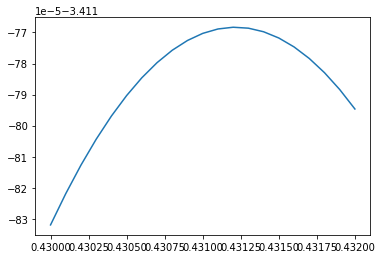

In [185]:
plt.plot(candidates, res)